In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
from matplotlib import pyplot as plt
import xgboost as xgb
from sklearn.linear_model import LogisticRegression

### Preparing data

In [2]:
# Categorical features.
DICT_INTENT = ['DEBTCONSOLIDATION','EDUCATION', 'HOMEIMPROVEMENT', 'MEDICAL', 'PERSONAL', 'VENTURE']
DICT_PHO =  ['MORTGAGE', 'OTHER', 'OWN', 'RENT']

def row_to_numbers(row):
  # Add all numerical features.
  ans = [
    row['person_age'],row['person_income'],row['person_emp_length'],row['loan_amnt'],
    row['loan_int_rate'], row['loan_percent_income'], row['cb_person_cred_hist_length']
  ]
  
  loan_grade = 7 - (ord(row['loan_grade'])-ord('A'))
  assert 1 <= loan_grade <= 7
  ans += [loan_grade]
  
  pdof = row["cb_person_default_on_file"]
  assert pdof in "NY"
  ans += [1 if pdof=="Y" else 0]
  
  ans += [int(row["loan_intent"]==DICT_INTENT[i]) for i in range(len(DICT_INTENT))]
  ans += [int(row["person_home_ownership"]==DICT_PHO[i]) for i in range(len(DICT_PHO))]
  
  return ans
  
def df_to_x(df):
  ans = []
  for _, row in df.iterrows():
    ans.append(row_to_numbers(row))
  return np.array(ans)

def df_to_y(df):
  return np.array([row['loan_status'] for _, row in df.iterrows()])



df_train = pd.read_csv('train.csv')
X_train_full = df_to_x(df_train)
y_train_full = df_to_y(df_train)

X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.01, random_state=0)
print(X_train.shape, y_train.shape, X_val.shape, y_val.shape)

(58058, 19) (58058,) (587, 19) (587,)


### Training

In [44]:
import tensorflow as tf
from tensorflow.keras import layers, optimizers


model = tf.keras.Sequential()
model.add(layers.BatchNormalization())
model.add(layers.Dense(16, activation='tanh'))
model.add(layers.Dense(16, activation='tanh'))
model.add(layers.Dense(4, activation='sigmoid'))
model.add(layers.Dense(1, activation='sigmoid'))
optimizer="adam" #optimizers.SGD(learning_rate=0.01)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy', 'auc'])

hist = model.fit(X_train, y_train, epochs=100, batch_size=100, validation_split=0.1)

Epoch 1/100
523/523 ━━━━━━━━━━━━━━━━━━━━ 1s 922us/step - accuracy: 0.8569 - auc: 0.8033 - loss: 0.4109 - val_accuracy: 0.8781 - val_auc: 0.8899 - val_loss: 0.2943
Epoch 2/100
523/523 ━━━━━━━━━━━━━━━━━━━━ 0s 677us/step - accuracy: 0.8970 - auc: 0.8765 - loss: 0.2826 - val_accuracy: 0.9132 - val_auc: 0.9052 - val_loss: 0.2581
Epoch 3/100
523/523 ━━━━━━━━━━━━━━━━━━━━ 0s 664us/step - accuracy: 0.9152 - auc: 0.8923 - loss: 0.2519 - val_accuracy: 0.9308 - val_auc: 0.9116 - val_loss: 0.2316
Epoch 4/100
523/523 ━━━━━━━━━━━━━━━━━━━━ 0s 691us/step - accuracy: 0.9265 - auc: 0.9006 - loss: 0.2289 - val_accuracy: 0.9340 - val_auc: 0.9170 - val_loss: 0.2195
Epoch 5/100
523/523 ━━━━━━━━━━━━━━━━━━━━ 0s 674us/step - accuracy: 0.9288 - auc: 0.9085 - loss: 0.2212 - val_accuracy: 0.9368 - val_auc: 0.9214 - val_loss: 0.2107
Epoch 6/100
523/523 ━━━━━━━━━━━━━━━━━━━━ 0s 676us/step - accuracy: 0.9314 - auc: 0.9109 - loss: 0.2138 - val_accuracy: 0.9327 - val_auc: 0.9233 - val_loss: 0.2069
Epoch 7/100
523/523 ━━

523/523 ━━━━━━━━━━━━━━━━━━━━ 0s 740us/step - accuracy: 0.9419 - auc: 0.9289 - loss: 0.1815 - val_accuracy: 0.9478 - val_auc: 0.9354 - val_loss: 0.1794
Epoch 84/100
523/523 ━━━━━━━━━━━━━━━━━━━━ 0s 731us/step - accuracy: 0.9418 - auc: 0.9329 - loss: 0.1808 - val_accuracy: 0.9464 - val_auc: 0.9343 - val_loss: 0.1806
Epoch 85/100
523/523 ━━━━━━━━━━━━━━━━━━━━ 0s 702us/step - accuracy: 0.9415 - auc: 0.9291 - loss: 0.1834 - val_accuracy: 0.9473 - val_auc: 0.9348 - val_loss: 0.1808
Epoch 86/100
523/523 ━━━━━━━━━━━━━━━━━━━━ 0s 748us/step - accuracy: 0.9431 - auc: 0.9331 - loss: 0.1791 - val_accuracy: 0.9471 - val_auc: 0.9341 - val_loss: 0.1808
Epoch 87/100
523/523 ━━━━━━━━━━━━━━━━━━━━ 0s 733us/step - accuracy: 0.9431 - auc: 0.9323 - loss: 0.1799 - val_accuracy: 0.9459 - val_auc: 0.9348 - val_loss: 0.1807
Epoch 88/100
523/523 ━━━━━━━━━━━━━━━━━━━━ 0s 762us/step - accuracy: 0.9413 - auc: 0.9324 - loss: 0.1829 - val_accuracy: 0.9456 - val_auc: 0.9342 - val_loss: 0.1810
Epoch 89/100
523/523 ━━━━━━━━

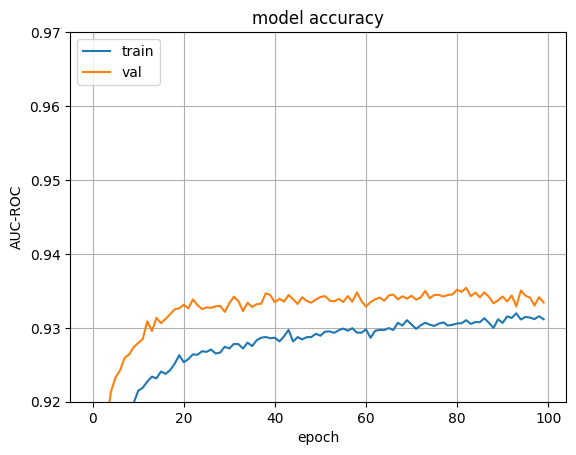

In [45]:
plt.plot(hist.history['auc'])
plt.plot(hist.history['val_auc'])
plt.title('model accuracy')
plt.ylabel('AUC-ROC')
plt.xlabel('epoch')
plt.ylim([0.92, 0.97])
plt.grid()
plt.legend(['train', 'val'], loc='upper left')
plt.show()

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


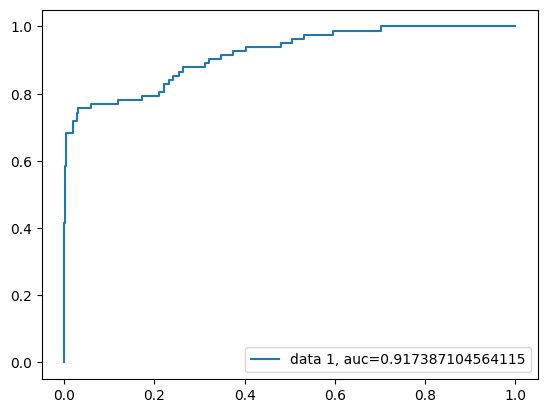

In [46]:
# Validation.

y_pred_proba = model.predict(X_val)
fpr, tpr, _ = metrics.roc_curve(y_val, y_pred_proba)
auc = metrics.roc_auc_score(y_val, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [52]:
df_test = pd.read_csv('test.csv')
X_test = df_to_x(df_test)
print(X_test.shape)

y_pred = model.predict(X_test).reshape((-1))

df_ans = pd.DataFrame({"id":df_test['id'], "loan_status": y_pred})
df_ans.to_csv('ans_nn.csv',index=False)

(39098, 19)
1222/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step


Kaggle score 0.93124.